## Flight delays- Data Exploration and Analysis with Pandas

Problem: Our dataset contains data from the Bureau of the United States of transportation about the arrival, delay, and cancellation of domestic flights from July 2019 to July 2022. We will investigate and highlight which airlines and airports have the most delay and cancellation over time. We will also analyse the causes of the delays and cancellation.

## 1-Data Exploration
The first step of any data analysis is to explore your data with key Pandas commands:

Import the Pandas library only onced in your script:


In [6]:
#put you code below:
import pandas as pd

The dataset has 3 CSV files, let's import them all one by one, named them df1 to df3:

In [7]:
from google.colab import files
uploaded = files.upload()
uploaded = files.upload()
uploaded = files.upload()

Saving Flights_Delay_Cause_2019-2020.csv to Flights_Delay_Cause_2019-2020.csv


Saving Flights_Delay_Cause_2020-2021.csv to Flights_Delay_Cause_2020-2021.csv


Saving Flights_Delay_Cause_2021-2022.csv to Flights_Delay_Cause_2021-2022.csv


In [8]:


df1 =pd.read_csv('Flights_Delay_Cause_2019-2020.csv')
df2 = pd.read_csv('Flights_Delay_Cause_2020-2021.csv')
df3 = pd.read_csv('Flights_Delay_Cause_2021-2022.csv')


The dataset contains data from US domestic flights from July 2019 to July 2022, and consists of the following fields:

- year: the year of the flight
- month: the month of the flight
- carrier: the 2 letters abbreviation for the airline
- carrier_name: the complete name of the airline
- airport: the 3 letters Airport code
- airport_name: the airport full name
- arr_flights: number of arrived flights ontime
- arr_del15: number of delayed flights (flights are considered delayed after 15 minutes of the arrival time)
- arr_cancelled: number of cancelled flights
- arr_diverted: number of diverted flights
- arr_delay: number of delayed flights
- carrier_delay: number of flights delayed caused by the carrier
- weather_delay: number of flights delayed caused by the weather
- nas_delay: number of flighst delayed caused by the National Aviation System
- security_delay: number of flights delayed due to security issues


Let's explore the 5 first rows of the dataframe named df1:


In [9]:
#put you code below:
df1.head(5)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.0,0.0,129.0,98.0,23.0,8.0,0.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,0.0,0.0,1664.0,887.0,52.0,224.0,0.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.0,4.0,1523.0,388.0,35.0,511.0,0.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,0.0,1.0,657.0,103.0,82.0,93.0,25.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0


Similarly, explore the 5 last rows of df1:

In [10]:
#put you code below:
df1.tail()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay
1675,2022,7,YX,Republic Airline,STL,"St. Louis, MO: St Louis Lambert International",131.0,26.0,6.0,0.0,2054.0,501.0,361.0,298.0,0.0
1676,2022,7,YX,Republic Airline,SYR,"Syracuse, NY: Syracuse Hancock International",149.0,35.0,2.0,0.0,2198.0,679.0,139.0,425.0,0.0
1677,2022,7,YX,Republic Airline,TUL,"Tulsa, OK: Tulsa International",10.0,2.0,0.0,0.0,135.0,8.0,0.0,11.0,0.0
1678,2022,7,YX,Republic Airline,TVC,"Traverse City, MI: Cherry Capital",98.0,13.0,1.0,0.0,950.0,162.0,0.0,291.0,0.0
1679,2022,7,YX,Republic Airline,XNA,"Fayetteville, AR: Northwest Arkansas Regional",56.0,13.0,3.0,0.0,1180.0,120.0,0.0,318.0,0.0


Since our dataset has 3 CSV files, for convenience let's combine all files in one document
using the .concat() method, explore the official documentation of the .concat() method to find out
how to use it properly, read examples: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html


In [11]:
frames = [df1,df2,df3]
finaldf = pd.concat(frames)
finaldf

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.0,0.0,129.0,98.0,23.0,8.0,0.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,0.0,0.0,1664.0,887.0,52.0,224.0,0.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.0,4.0,1523.0,388.0,35.0,511.0,0.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,0.0,1.0,657.0,103.0,82.0,93.0,25.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18831,2020,8,YV,Mesa Airlines Inc.,TUS,"Tucson, AZ: Tucson International",62.0,5.0,2.0,0.0,497.0,350.0,0.0,91.0,0.0
18832,2020,8,YV,Mesa Airlines Inc.,VPS,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",40.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
18833,2020,8,YV,Mesa Airlines Inc.,XNA,"Fayetteville, AR: Northwest Arkansas Regional",54.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
18834,2020,8,YX,Republic Airline,ACK,"Nantucket, MA: Nantucket Memorial",64.0,3.0,0.0,0.0,115.0,0.0,19.0,38.0,0.0


Let's explore the first few rows of the whole dataset:

In [12]:
finaldf.head(10)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.0,0.0,129.0,98.0,23.0,8.0,0.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,0.0,0.0,1664.0,887.0,52.0,224.0,0.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.0,4.0,1523.0,388.0,35.0,511.0,0.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,0.0,1.0,657.0,103.0,82.0,93.0,25.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0
5,2022,7,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",114.0,16.0,5.0,0.0,1145.0,131.0,207.0,64.0,0.0
6,2022,7,9E,NaN,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2219.0,470.0,8.0,10.0,41843.0,18321.0,1554.0,7029.0,0.0
7,2022,7,9E,NaN,ATW,"Appleton, WI: Appleton International",17.0,3.0,0.0,0.0,73.0,43.0,0.0,30.0,0.0
8,2022,7,9E,Endeavor Air Inc.,AUS,"Austin, TX: Austin - Bergstrom International",37.0,4.0,3.0,0.0,301.0,279.0,22.0,0.0,0.0
9,2022,7,9E,Endeavor Air Inc.,AVL,"Asheville, NC: Asheville Regional",59.0,13.0,7.0,0.0,630.0,195.0,20.0,321.0,0.0


How many rows and columns the dataset has?


Use the .info() medthod to finds out the number of rows and columns, the data types of each columns, the number of non-missing values (non-null), memory usage. Columns that contains strings datat (or mixed datatypes) will be recognised as Object in Pandas.

In [13]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42461 entries, 0 to 18835
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            42461 non-null  int64  
 1   month           42461 non-null  int64  
 2   carrier         42461 non-null  object 
 3   carrier_name    42445 non-null  object 
 4   airport         42461 non-null  object 
 5   airport_name    42461 non-null  object 
 6   arr_flights     42354 non-null  float64
 7   arr_del15       42183 non-null  float64
 8   arr_cancelled   42354 non-null  float64
 9   arr_diverted    42354 non-null  float64
 10  arr_delay       42354 non-null  float64
 11  carrier_delay   42354 non-null  float64
 12  weather_delay   42354 non-null  float64
 13  nas_delay       42354 non-null  float64
 14  security_delay  42354 non-null  float64
dtypes: float64(9), int64(2), object(4)
memory usage: 5.2+ MB


Make sure to check whether columns containing numerical values need to be converted as numeric for proper downstream analyses.

Alternatively, we can use the attribute shape to have only returned the number of rows and columns:

In [14]:
finaldf.shape

(42461, 15)

The attribute dtypes will return only the data types of each column:

In [15]:
finaldf.dtypes

year                int64
month               int64
carrier            object
carrier_name       object
airport            object
airport_name       object
arr_flights       float64
arr_del15         float64
arr_cancelled     float64
arr_diverted      float64
arr_delay         float64
carrier_delay     float64
weather_delay     float64
nas_delay         float64
security_delay    float64
dtype: object

We can quickly run some statistics with the describe() function:

In [16]:
finaldf.describe()

,year,month,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay
count,42461.000000,42461.000000,42354.000000,42183.000000,42354.000000,42354.000000,42354.000000,42354.000000,42354.000000,42354.000000,42354.000000
mean,2020.096324,6.529521,290.053950,41.470095,9.251641,0.624357,2757.859210,1007.217996,177.938495,582.413656,6.496647
std,0.815651,3.341909,836.485771,130.737062,70.613366,3.069780,9664.845862,3405.101443,742.131883,2610.575882,45.371314
min,2019.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,4.000000,33.000000,3.000000,0.000000,0.000000,158.000000,49.000000,0.000000,9.000000,0.000000
50%,2020.000000,7.000000,81.000000,10.000000,0.000000,0.000000,566.000000,211.000000,0.000000,80.000000,0.000000
75%,2021.000000,9.000000,194.000000,28.000000,3.000000,0.000000,1737.000000,705.000000,99.000000,282.000000,0.000000
max,2022.000000,12.000000,21873.000000,3506.000000,4951.000000,154.000000,305694.000000,119425.000000,26428.000000,88311.000000,3760.000000


Note: the 'year' and 'month' columns are seen as numerical values (they have the float datatype, as seen with the info() function). Hence, they will appear in the summary stats when using the describe() function. We would need to assigned to both the datetime datatype to be properly seen as dates.

## 2.Data Tranformation:

After exploring the dataset variables, some data transformation might be needed.

From the previous method used .info() we could see that the year and month are both float data types. To work efficiently with dates in Pandas, they need to be converted into a date datatype. This is done by using the .todatetime() method as followed:

Before doing any modications to our dataframe, we will create a copy to not modify yet the original dataset in case we insert an error and cannot remove it. If you make an error in the original dataset without creating a copy you will need to restart the Python intrepreter to clear data in memory and re-run your script from the start.

In [76]:
df_copy=finaldf.copy(deep=True)

We could convert the year and month directly to date datatype but by default, the function will give us a day and month number associated to each date, which is not what we want to insert a wrong day and month

We can create a new column named "date" to store the date which will have the "month" and "year" from our dataset. We can concatenate our 2 columns month and year using the "+" sign:

we need to change the month and year datatypes to a string.
The .astype() method is used to cast pandas datatype to others:

In [77]:
df_copy=df_copy.astype({"month": str, "year":str})


Now our month and year column have been well transformed to a string data type called object in Pandas

In [78]:
#alternative method to convert datatypes in Pandas:
df_copy['month'].astype(str)
df_copy['year'].astype(str)


0        2022
1        2022
2        2022
3        2022
4        2022
         ... 
18831    2020
18832    2020
18833    2020
18834    2020
18835    2020
Name: year, Length: 42461, dtype: object

In [79]:
df_copy['date']= df_copy['year']+"-"+df_copy['month']

In [80]:
df_copy.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,date
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.0,0.0,129.0,98.0,23.0,8.0,0.0,2022-7
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,2022-7
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,2022-7
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,0.0,1.0,657.0,103.0,82.0,93.0,25.0,2022-7
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,2022-7


We can see from the column 'data' that we could assign datatime as datatype to the 'date' column, but doing this we also introduced by default a day number, here '01'. To overcome this we would beed to use an additonal function to get only the month and the year with a correct date format.

In [81]:
from datetime import datetime
df_copy['date']= pd.to_datetime(df_copy['date']).dt.to_period('M')
#.dt.to_period('M') converts the datetime values into a PeriodIndex with a monthly frequency (period)

In [82]:
df_copy.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,date
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.0,0.0,129.0,98.0,23.0,8.0,0.0,2022-07
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,2022-07
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,2022-07
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,0.0,1.0,657.0,103.0,82.0,93.0,25.0,2022-07
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,2022-07


Now Let us check the data type of all columns

In [83]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42461 entries, 0 to 18835
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   year            42461 non-null  object   
 1   month           42461 non-null  object   
 2   carrier         42461 non-null  object   
 3   carrier_name    42445 non-null  object   
 4   airport         42461 non-null  object   
 5   airport_name    42461 non-null  object   
 6   arr_flights     42354 non-null  float64  
 7   arr_del15       42183 non-null  float64  
 8   arr_cancelled   42354 non-null  float64  
 9   arr_diverted    42354 non-null  float64  
 10  arr_delay       42354 non-null  float64  
 11  carrier_delay   42354 non-null  float64  
 12  weather_delay   42354 non-null  float64  
 13  nas_delay       42354 non-null  float64  
 14  security_delay  42354 non-null  float64  
 15  date            42461 non-null  period[M]
dtypes: float64(9), object(6), period[M](1)
memory

The 'date' column was assigned the 'period' datatype which is another date fromat used in pandas.

Our new column "date" as been well created. Let's save it in our working folder:

In [84]:
df_copy.to_csv('flights_dataset.csv')

Note: in the event you work with a dataset that has a column containing the full date named "date" for instance, you can set the date column to the datatype datetime directly when importing your dataset with Pandas using the argument "parse_dates" when calling the Pandas function such as: df=pd.read_csv("datafile", parse_dates=["date"])
This will give you a date format with days, months, and years by default

Let's removed unwanted columns, the month and year columns, using the medthod .drop():

In [85]:
df_copy = df_copy.drop(['year','month'],axis = 1)

The columns month and year has been well removed.

## 3-Data Cleaning
The next step after exploring our dataset and correct some of the datatypes we did would be to clean the dataset

Let's check how many missing values our dataset has using the isnull() and sum() function:

In [27]:
df_copy.isnull().values.any(axis = 0)

array([False,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False])

In [28]:
df_copy.isnull().sum()

carrier             0
carrier_name       16
airport             0
airport_name        0
arr_flights       107
arr_del15         278
arr_cancelled     107
arr_diverted      107
arr_delay         107
carrier_delay     107
weather_delay     107
nas_delay         107
security_delay    107
date                0
dtype: int64

In [29]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42461 entries, 0 to 18835
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   carrier         42461 non-null  object   
 1   carrier_name    42445 non-null  object   
 2   airport         42461 non-null  object   
 3   airport_name    42461 non-null  object   
 4   arr_flights     42354 non-null  float64  
 5   arr_del15       42183 non-null  float64  
 6   arr_cancelled   42354 non-null  float64  
 7   arr_diverted    42354 non-null  float64  
 8   arr_delay       42354 non-null  float64  
 9   carrier_delay   42354 non-null  float64  
 10  weather_delay   42354 non-null  float64  
 11  nas_delay       42354 non-null  float64  
 12  security_delay  42354 non-null  float64  
 13  date            42461 non-null  period[M]
dtypes: float64(9), object(4), period[M](1)
memory usage: 5.9+ MB


We can see see that missing values are presents in columns associated with numerical values and also in the carrier name. Missing data from the columns that contain important information on the name of the carrier or arilaine names that we are not able to identify can cause issues in our downstream analysis. We will me removed those for now since we cannot identify them.
Replacing missing values should always be case specific!

let's remove missing values from the carrier name:

In [30]:
df_copy.dropna(subset = 'carrier_name',inplace = True)

Let's verify the dataframe don't have any missing values left:

In [31]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42445 entries, 0 to 18835
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   carrier         42445 non-null  object   
 1   carrier_name    42445 non-null  object   
 2   airport         42445 non-null  object   
 3   airport_name    42445 non-null  object   
 4   arr_flights     42338 non-null  float64  
 5   arr_del15       42167 non-null  float64  
 6   arr_cancelled   42338 non-null  float64  
 7   arr_diverted    42338 non-null  float64  
 8   arr_delay       42338 non-null  float64  
 9   carrier_delay   42338 non-null  float64  
 10  weather_delay   42338 non-null  float64  
 11  nas_delay       42338 non-null  float64  
 12  security_delay  42338 non-null  float64  
 13  date            42445 non-null  period[M]
dtypes: float64(9), object(4), period[M](1)
memory usage: 4.9+ MB


In [32]:
df_copy.isnull().values.any(axis = 1)

array([False, False, False, ..., False, False, False])

In [33]:
df_copy.isnull().sum()

carrier             0
carrier_name        0
airport             0
airport_name        0
arr_flights       107
arr_del15         278
arr_cancelled     107
arr_diverted      107
arr_delay         107
carrier_delay     107
weather_delay     107
nas_delay         107
security_delay    107
date                0
dtype: int64

### Let's check the distribution of the data:

if you don't recall the name of the variables, use the following command to quickly get their names:

In [34]:
df_copy.columns
df2 = df_copy.copy()
df2.index

Index([    0,     1,     2,     3,     4,     5,     8,     9,    10,    11,
       ...
       18826, 18827, 18828, 18829, 18830, 18831, 18832, 18833, 18834, 18835],
      dtype='int64', length=42445)

We can check the data distribution to see if we get outliers in columns with numerical values using the built-in box_plot function in Pandas:

we apply the method .box_plot to our dataframe named "df"

In [35]:
%matplotlib inline

<Axes: >

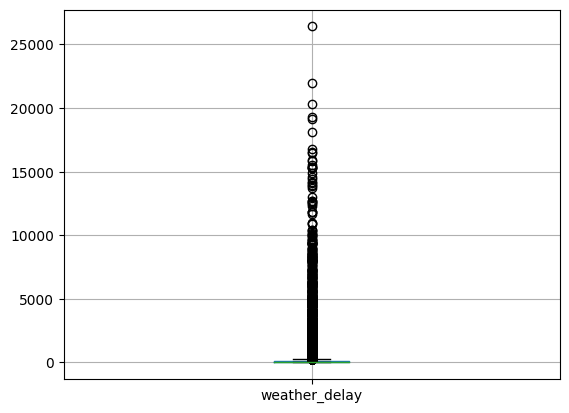

In [36]:
df_copy.boxplot("weather_delay")

let's reuse the boxplot using a function:

In [37]:
def box_plot(flights):
    return df_copy.boxplot(flights)

<Axes: >

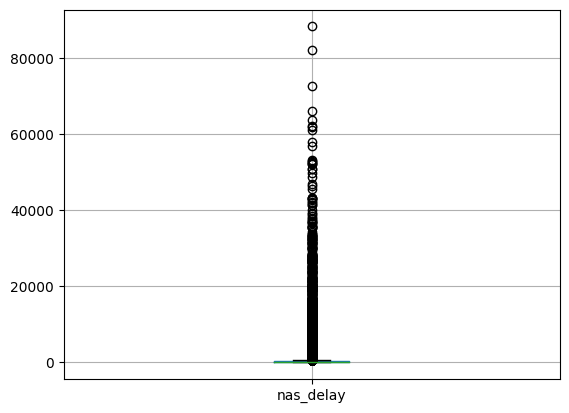

In [38]:
#We call our function passing a data variable as argument:
box_plot('nas_delay')

Call the function again to check other variables.

In [39]:
# Identify and remove the row with the outlier
outlier_index= df_copy[df_copy['nas_delay']>175000].index
df_cleaned= df_copy.drop(outlier_index)

In [40]:
outlier_index # we used the .index attribute to get the row number of our outlier

Index([], dtype='int64')

<Axes: >

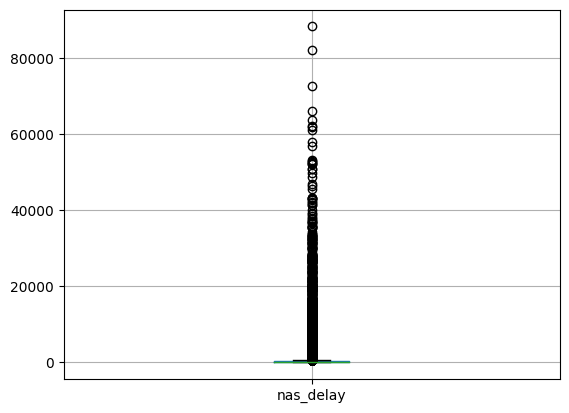

In [41]:
df_cleaned.boxplot('nas_delay')


We can see from the above boxplot that the outliser has been well removed.

Using the Python Matplotlib visualisation library, we can plot several plots at once using the subplots() function:

Let's import the Matplotlib library to use it

In [42]:
import matplotlib.pyplot as plt

<Axes: >

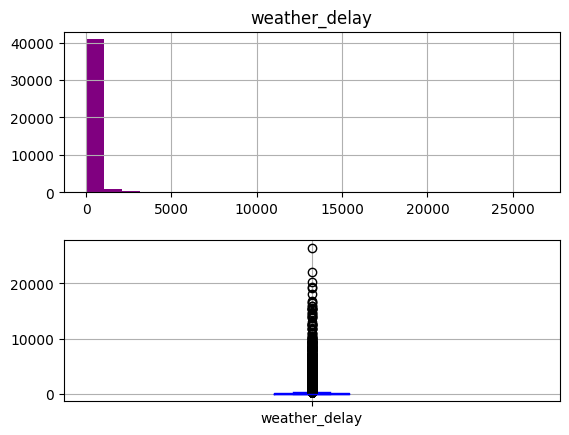

In [43]:
figure, ax = plt.subplots(nrows=2, ncols=1) # subplot layer has 2 rows an 1 column which means 2 figures
df_cleaned.hist('weather_delay',ax=ax[0], bins=25, color="purple")
df_cleaned.boxplot("weather_delay",ax=ax[1], color="blue")


Same as before, but saved into a function to reuse:

In [44]:
def subplot_function(data1, data2):  # I added one parameter per plot
    figure, ax = plt.subplots(nrows=2, ncols=1)

    # Get statistics
    min_val= df_cleaned[data1].min()
    max_val= df_cleaned[data1].max()
    mean_val= df_cleaned[data1].mean()
    med_val= df_cleaned[data1].median()

    # Add lines for the min, mean and median, and max
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'blue', linestyle='dashed', linewidth = 2)

    #Change labels- 1st plot
    ax[0].set_ylabel('Frequency')

    df_cleaned.hist(data1,ax=ax[0], bins=10, color="purple")


    #Change labels- 2nd plot
    ax[1].set_xlabel('')
    ax[1].set_ylabel('Frequency')


    df_cleaned.boxplot(data2,ax=ax[1], color="blue")

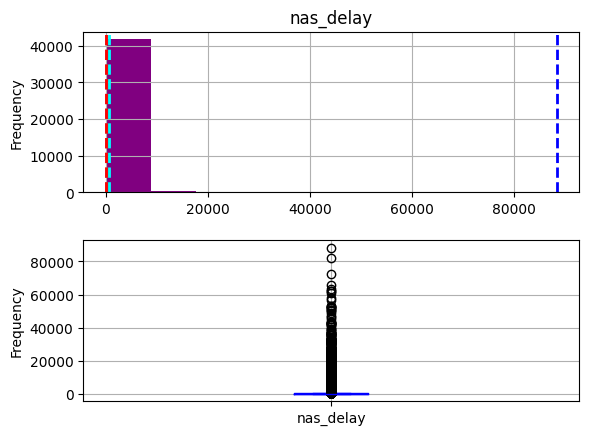

In [45]:
subplot_function('nas_delay',"nas_delay")

## 4-Data Analysis


#### Q1-Which Airlines has the most delayed flights?

We can group the airline data and calculate the average of delayed flights per airline using the .groupby() method and mean() function

Ans :  Southwest Airlines Co.
              arr_delay = 6472.33

In [46]:
m = round(df_cleaned.groupby('carrier_name',as_index = False)["arr_delay"].mean(),2)
m

,carrier_name,arr_delay
0,Alaska Airlines Inc.,1532.66
1,Allegiant Air,1115.49
2,American Airlines Inc.,6320.16
3,Delta Air Lines Inc.,3654.66
4,Endeavor Air Inc.,1428.23
5,Envoy Air,1439.01
6,ExpressJet Airlines LLC,1489.99
7,Frontier Airlines Inc.,1233.90
8,Hawaiian Airlines Inc.,1079.16
9,Horizon Air,1053.48


In [47]:
m.size

36

each arilines have associated the mean of deyalyed flights.

Let's plot the data using the Matplotlib and Seaborn visualisation libraries:

Always import a library prior to use it (only once in your script!):


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

prior any plotting let's sort the data and use a barplot to plot the data to find out which airline has the most delayed flights:

In [49]:
m = m.sort_values(by='arr_delay',ascending=False)
m

,carrier_name,arr_delay
15,Southwest Airlines Co.,6472.33
2,American Airlines Inc.,6320.16
10,JetBlue Airways,4308.41
17,United Air Lines Inc.,4108.92
3,Delta Air Lines Inc.,3654.66
16,Spirit Air Lines,3036.84
14,SkyWest Airlines Inc.,2716.26
13,Republic Airline,2391.44
12,PSA Airlines Inc.,2242.48
11,Mesa Airlines Inc.,1892.13


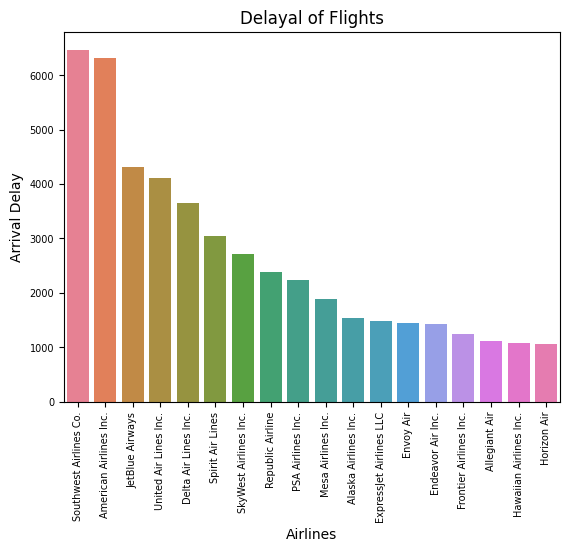

In [50]:
sns.barplot(data = m,x = 'carrier_name', y = 'arr_delay',errorbar = None,hue='carrier_name')
plt.xticks(rotation=90,fontsize = 7)
plt.yticks(fontsize=7)
plt.title('Delayal of Flights')
plt.xlabel('Airlines')
plt.ylabel('Arrival Delay')
plt.show()

#### Q2-Which Airline is the most affected by both delayed and cancelled flights?

 Ans  :  Southwest Airlines Co. -
            arr_delay = 6472.33,
            arr_cancelled =  41.72

let's use a similar approach as the previous analysis with the groupby() method and ploting the relevant data:

In [51]:
m2 = round(df_cleaned.groupby('carrier_name')[['arr_delay','arr_cancelled']].mean(),2)
m3 = round(df_cleaned.groupby('carrier_name')[['arr_delay','arr_cancelled','carrier_delay','weather_delay','nas_delay','security_delay']].mean(),2)
m2

,arr_delay,arr_cancelled
carrier_name,,
Alaska Airlines Inc.,1532.66,4.39
Allegiant Air,1115.49,5.34
American Airlines Inc.,6320.16,19.72
Delta Air Lines Inc.,3654.66,10.10
Endeavor Air Inc.,1428.23,3.94
Envoy Air,1439.01,5.37
ExpressJet Airlines LLC,1489.99,5.38
Frontier Airlines Inc.,1233.90,2.91
Hawaiian Airlines Inc.,1079.16,5.20


Let's investigate what could be the cause of the delayed of that company based on the data we have.

Prior Plotting Lets sort the data we have

In [52]:
m2 = m2.sort_values(by='arr_delay',ascending=False)
m2

,arr_delay,arr_cancelled
carrier_name,,
Southwest Airlines Co.,6472.33,41.72
American Airlines Inc.,6320.16,19.72
JetBlue Airways,4308.41,7.29
United Air Lines Inc.,4108.92,12.21
Delta Air Lines Inc.,3654.66,10.10
Spirit Air Lines,3036.84,4.88
SkyWest Airlines Inc.,2716.26,6.29
Republic Airline,2391.44,8.32
PSA Airlines Inc.,2242.48,8.20


In [53]:
#plotting using plotly
import plotly.express as px
fig = px.bar(m2)
fig.update_layout(
    title = 'Cancelled and Delayed Flights',
    xaxis_title ='Airlines',
    yaxis_title='Arrival delay and Cancelled'
)
fig.show()

#### Q3-What are the main cause of flights cancellations and delays for the company Southwest Airlines Co.?

Ans : Two main causes For Flights cancellation and delay are  - **carrier delay and nas delay.**

Arrival delay's main cause is Carrier delay and

Arrival Cancelled's main cause is nas delay.

Let's isolate data from the Southwest Airlines Co. to look at the causes. To do this we need to search for the company name in carrier_name column and isolate all columns related to that carrier.

In [54]:
df_cleaned["carrier_name"].str.contains("Southwest Airlines Co.")

0        False
1        False
2        False
3        False
4        False
         ...  
18831    False
18832    False
18833    False
18834    False
18835    False
Name: carrier_name, Length: 42445, dtype: bool

In [55]:
df_SW_airline=df_cleaned[df_cleaned["carrier_name"].str.contains("Southwest Airlines Co.")]

In [56]:
df_SW_airline.head()

,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,date
1409,WN,Southwest Airlines Co.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",687.0,226.0,6.0,1.0,12541.0,4255.0,66.0,720.0,60.0,2022-07
1410,WN,Southwest Airlines Co.,ALB,"Albany, NY: Albany International",293.0,80.0,6.0,0.0,5679.0,2147.0,126.0,116.0,19.0,2022-07
1411,WN,Southwest Airlines Co.,AMA,"Amarillo, TX: Rick Husband Amarillo International",200.0,48.0,4.0,0.0,2940.0,1033.0,35.0,128.0,0.0,2022-07
1412,WN,Southwest Airlines Co.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2718.0,875.0,25.0,8.0,51674.0,16615.0,1812.0,6030.0,52.0,2022-07
1413,WN,Southwest Airlines Co.,AUS,"Austin, TX: Austin - Bergstrom International",3046.0,874.0,23.0,4.0,47176.0,16714.0,1228.0,4232.0,234.0,2022-07


To confirm we have well isolated one carrier only:

In [57]:
count=df_SW_airline[["carrier_name","carrier"]].nunique()
print(count)

carrier_name    1
carrier         1
dtype: int64


To confirm we have well isolated one carrier only- alternative method:

In [58]:
df_SW_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2406 entries, 1409 to 18748
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   carrier         2406 non-null   object   
 1   carrier_name    2406 non-null   object   
 2   airport         2406 non-null   object   
 3   airport_name    2406 non-null   object   
 4   arr_flights     2406 non-null   float64  
 5   arr_del15       2406 non-null   float64  
 6   arr_cancelled   2406 non-null   float64  
 7   arr_diverted    2406 non-null   float64  
 8   arr_delay       2406 non-null   float64  
 9   carrier_delay   2406 non-null   float64  
 10  weather_delay   2406 non-null   float64  
 11  nas_delay       2406 non-null   float64  
 12  security_delay  2406 non-null   float64  
 13  date            2406 non-null   period[M]
dtypes: float64(9), object(4), period[M](1)
memory usage: 282.0+ KB


Data set has 2406 entries and lets check the carrier name now

In [59]:
df_SW_airline["carrier_name"].value_counts()

carrier_name
Southwest Airlines Co.    2406
Name: count, dtype: int64

In [60]:
df_SW_airline.keys() # same as the .columns attribute

Index(['carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights',
       'arr_del15', 'arr_cancelled', 'arr_diverted', 'arr_delay',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'date'],
      dtype='object')

We are selecting only the columns related to causes for Flights Delay and Cancel

In [61]:
df_SW_subset=df_SW_airline[["arr_delay","arr_cancelled","carrier_delay","weather_delay","nas_delay","security_delay"]]


Finding the Correlation between them

Now we can see arr_delay and **carrier_delay** are highly corelated because it is in red.

arr_cancelled and **nas_delay** are correlated because it is light blue in colour

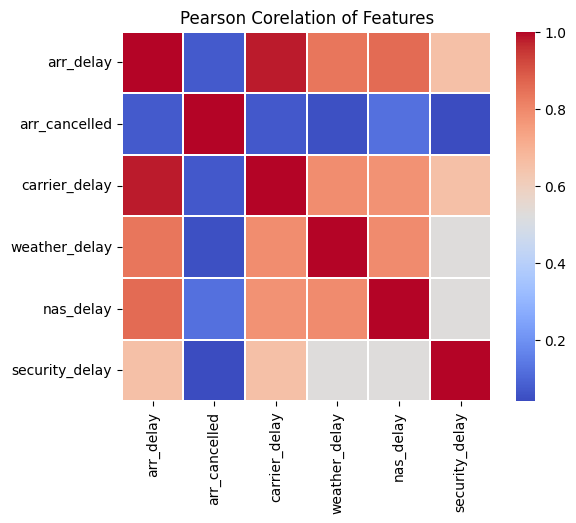

In [62]:
sns.heatmap(df_SW_subset.corr(method='pearson'),linewidths=0.1,square=True,cmap='coolwarm')
plt.title("Pearson Corelation of Features")
plt.show()

Selecting the Columns Carrier Name

In [63]:
df_SW_subset.head()

,arr_delay,arr_cancelled,carrier_delay,weather_delay,nas_delay,security_delay
1409,12541.0,6.0,4255.0,66.0,720.0,60.0
1410,5679.0,6.0,2147.0,126.0,116.0,19.0
1411,2940.0,4.0,1033.0,35.0,128.0,0.0
1412,51674.0,25.0,16615.0,1812.0,6030.0,52.0
1413,47176.0,23.0,16714.0,1228.0,4232.0,234.0


In [64]:
sum_data=df_SW_subset.sum()
sum_data

arr_delay         15572414.0
arr_cancelled       100385.0
carrier_delay      5518974.0
weather_delay       441728.0
nas_delay          2542425.0
security_delay       48830.0
dtype: float64

In [65]:
sum_df= sum_data.to_frame()
sum_df

,0
arr_delay,15572414.0
arr_cancelled,100385.0
carrier_delay,5518974.0
weather_delay,441728.0
nas_delay,2542425.0
security_delay,48830.0


In [66]:
sum_df=sum_df.rename(columns={0: 'causes'})
sum_df

,causes
arr_delay,15572414.0
arr_cancelled,100385.0
carrier_delay,5518974.0
weather_delay,441728.0
nas_delay,2542425.0
security_delay,48830.0


plot the data to reply to the question

#### Q4-What are the main cause of flights cancellation and delays among the different airlines?

Ans :  Main cause of Flight cancellation and Delays are
           1. carrier delay   2. nas_delay

Use previous function and visualisation library to reply to this question

Now Lets Again do the correlation of Fields, to find the causes of Flight cancellation and flight delays for all the airlines

Lets create a data set with carrier name, arr_delay, arra-cancelled,and causes columns

In [67]:
df_sample =round(df_cleaned.groupby('carrier_name')[["arr_delay","arr_cancelled","carrier_delay","weather_delay","nas_delay","security_delay"]].mean(),2)
df_sample

,arr_delay,arr_cancelled,carrier_delay,weather_delay,nas_delay,security_delay
carrier_name,,,,,,
Alaska Airlines Inc.,1532.66,4.39,489.29,45.62,470.97,12.56
Allegiant Air,1115.49,5.34,387.44,79.33,188.02,4.80
American Airlines Inc.,6320.16,19.72,2414.16,346.05,1215.51,17.39
Delta Air Lines Inc.,3654.66,10.10,1622.45,207.14,886.90,7.71
Endeavor Air Inc.,1428.23,3.94,500.52,112.36,329.98,0.89
Envoy Air,1439.01,5.37,338.50,156.47,392.57,2.01
ExpressJet Airlines LLC,1489.99,5.38,457.69,51.33,574.25,0.00
Frontier Airlines Inc.,1233.90,2.91,366.64,31.70,327.61,0.00
Hawaiian Airlines Inc.,1079.16,5.20,732.44,36.57,14.77,7.82


After finding the correlation among the values it is found that

Arr_delay causes for all airlines are carrier delay and nas delay being the most important cause.

Cancellation of Flights are mainly due to Carrier delay and nas delay.

In [68]:
import seaborn as sns

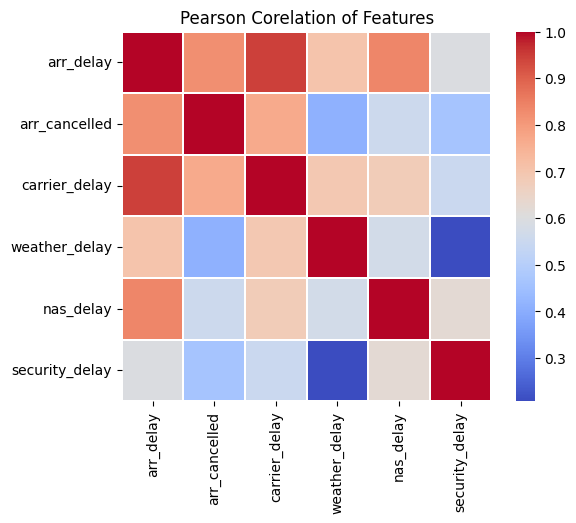

In [69]:
sns.heatmap(df_sample.corr(method='pearson'),linewidths=0.1,square=True,cmap='coolwarm')
plt.title("Pearson Corelation of Features")
plt.show()

bar Plot to show and compare the values across airlines

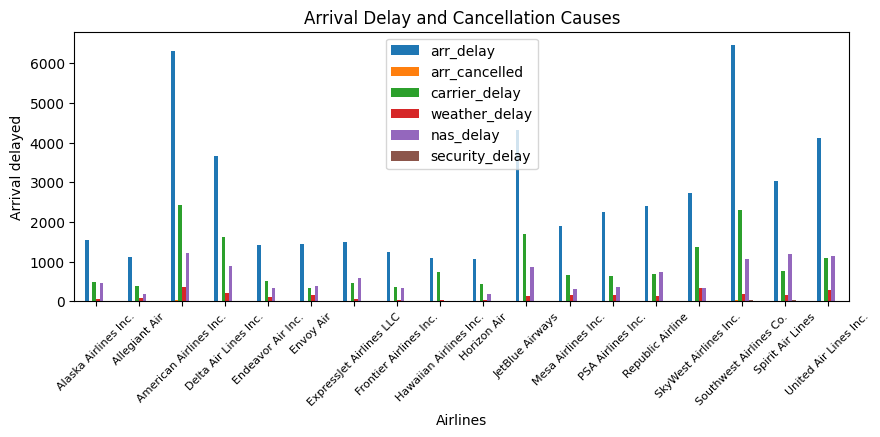

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
df_cleaned[['carrier_name']].nunique()
m3.plot(kind = 'bar',figsize = (10,3.5))
plt.xticks(rotation = 45, fontsize = 8)
plt.title('Arrival Delay and Cancellation Causes')
plt.xlabel('Airlines')
plt.ylabel('Arrival delayed')
plt.show()

In [71]:
m4 = ((df_cleaned.groupby('carrier_name')[['arr_delay','arr_cancelled','carrier_delay','weather_delay','nas_delay','security_delay']].sum()))
m4.sort_values(by = 'arr_delay',ascending = False)

,arr_delay,arr_cancelled,carrier_delay,weather_delay,nas_delay,security_delay
carrier_name,,,,,,
SkyWest Airlines Inc.,16387183.0,37943.0,8182570.0,2000633.0,1958682.0,22593.0
American Airlines Inc.,16261777.0,50740.0,6211644.0,890388.0,3127509.0,44734.0
Southwest Airlines Co.,15572414.0,100385.0,5518974.0,441728.0,2542425.0,48830.0
Delta Air Lines Inc.,11640096.0,32158.0,5167489.0,659732.0,2824764.0,24570.0
United Air Lines Inc.,9676500.0,28750.0,2556781.0,656028.0,2667294.0,1866.0
JetBlue Airways,6639257.0,11235.0,2624058.0,219192.0,1327384.0,21088.0
Republic Airline,5328133.0,18535.0,1502574.0,300027.0,1638510.0,7691.0
Envoy Air,5258153.0,19621.0,1236874.0,571728.0,1434445.0,7362.0
PSA Airlines Inc.,5224987.0,19096.0,1501095.0,356368.0,861212.0,9688.0
